In [2]:
import csv
import numpy as np
import scipy.integrate
import illustris_python as il
import matplotlib.pyplot as plt

In [3]:
SFR_star = []
with open('./SFR_AllZ', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR_star.append(row)

In [4]:
SFR_gas = []
with open('./SFR_gas_AllZ', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        SFR_gas.append(row)

In [5]:
basePath = './sims.TNG/TNG100-1/output/'

In [6]:
snapshots = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]
redshifts = []
for snap in snapshots:
    redshifts.append(il.groupcat.loadHeader(basePath, snap)['Redshift'])
redshifts = redshifts[:-1]
redshifts.append(int(0))

In [8]:
def lookback(z, omega_M, omega_L, h):
    '''
    Calculates the lookback time according to a specific cosmology.

    Parameters:
    z : float
        The redshift at which the lookback time is to be calculated
    omega_M : float
        The matter density parameter (0.30897)
    omega_L : float
        The dark energy density parameter (0.6911)
    h : float
        The hubble parameter (0.6774)
    '''
    def f(x):
        a = np.sqrt(omega_M*(1+x)**3 + omega_L)
        return 1/((1+x)*a)
    t_hubble = (1/(100*h))*3.0856776*10**19
    return t_hubble*scipy.integrate.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

In [9]:
LB_time = []
for redshift in redshifts: 
    LB_time.append(lookback(redshift, 0.30897, 0.6911, 0.6774))

In [ ]:
# combining the data

In [11]:
SFR = []
for snapshot_star, snapshot_gas in zip(SFR_star, SFR_gas):
    SFR_combined = []
    for value_star, value_gas in zip(snapshot_star, snapshot_gas):
        SFR_combined.append(float(value_star) + float(value_gas))
    SFR.append(SFR_combined)

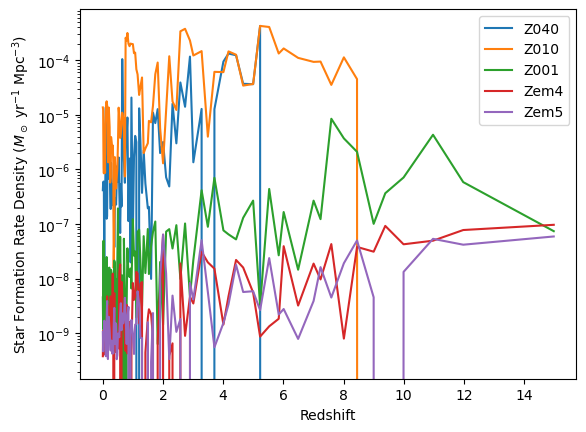

In [15]:
plt.plot(redshifts, SFR[0], label='Z040')
#plt.plot(redshifts, SFR[1], label='Z030')
#plt.plot(redshifts, SFR[2], label='Z020')
plt.plot(redshifts, SFR[3], label='Z010')
#plt.plot(redshifts, SFR[4], label='Z008')
#plt.plot(redshifts, SFR[5], label='Z006')
#plt.plot(redshifts, SFR[6], label='Z004')
#plt.plot(redshifts, SFR[7], label='Z003')
#plt.plot(redshifts, SFR[8], label='Z002')
plt.plot(redshifts, SFR[9], label='Z001')
plt.plot(redshifts, SFR[10], label='Zem4')
plt.plot(redshifts, SFR[11], label='Zem5')
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [24]:
SFR_total = []
for index in range(0,99):
    SFR_total.append(SFR[0][index] + SFR[1][index] + SFR[2][index] + SFR[3][index] + SFR[4][index] + SFR[5][index] + SFR[6][index] + SFR[7][index] + SFR[8][index] + SFR[9][index] + SFR[10][index] + SFR[11][index])

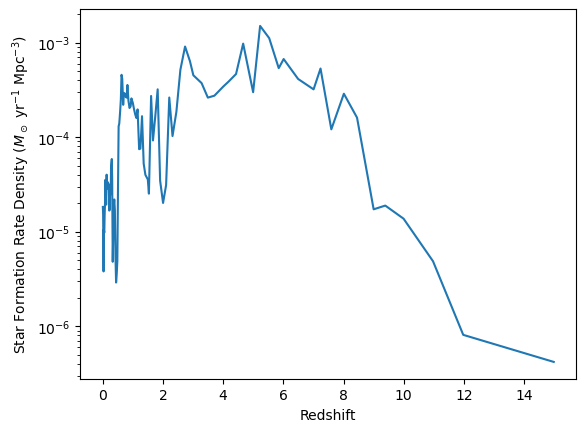

In [26]:
plt.plot(redshifts, SFR_total)
plt.yscale('log')
plt.ylabel('Star Formation Rate Density ($M_\odot$ yr$^{-1}$ Mpc$^{-3}$)')
plt.xlabel('Redshift')
plt.show()